<h1 style="font-family: Impact, Charcoal, sans-serif; padding: 12px; font-size: 30px; color: #8b4513; text-align: center; line-height: 1.25;">EXPAI Tecnical Test<br><span style="color: #800000; font-size: 48px"><b>Titanic Survival and Fare Predictions</b></span><br><span style="color: #a0522d; font-size: 20px">Binary Classification and Logistic Regression</span></h1>

<div style="display: flex; justify-content: center;">
  <img src="/Users/eo/src/data-ship-api/data/titanic.jpg" alt="Titanic"  style="width:200px;">
</div>

<p>Data source: <a href="https://www.kaggle.com/competitions/titanic/data">Titanic Dataset</a></p>


<h1><b><span style="color: #8b4513; font-size: 28px">TABLE OF CONTENTS</span></b></h1>

* [Exploratory Data Analysis](#1)
    * [Survival Prediction](#1.1)
    * [Fare Prediction](#1.2)
* [Data Preprocessing](#2)
* [Data Visualization](#3)
* [Building Model with Sklearn](#4)
    * [Make Predictions](#4.1)
    * [Prediction Interpretability using SHAP Values](#4.2)
* [Prediction](#5)

<a id="1"></a>
<h1><b><span style="color: #8b4513; font-size: 28px">Exploratory Data Analysis Questions</span></b></h1>

<a id="1.1"></a>
<h1 style="font-family: Trebuchet MS; font-size: 20px; color: #b47238; text-align: left; "><b>Survival Prediction</b></h1>

<details>

1. **Survival Rate**
   - What is the overall survival rate of passengers on the Titanic?

2. **Survival by Class**
   - How does the passenger class (1st, 2nd, or 3rd) influence the survival rate?

3. **Survival by Gender**
   - What is the survival rate for males and females?

4. **Age Distribution**
   - What is the distribution of ages among the passengers?

5. **Family Size**
   - What is the distribution of family sizes (SibSp + Parch) among passengers?

6. **Port of Embarkation**
   - How many passengers embarked from each port, and how does it relate to survival?

7. **Survival by Cabin Deck**
   - Does the deck level of the cabin influence survival rates?

8. **Title Analysis**
   - Can we extract titles from passenger names and see if they correlate with survival?

9. **Correlation Analysis**
   - Explore correlations between different features and survival.

10. **Missing Data**
    - Identify and handle missing data in the dataset.

11. **Outliers**
    - Detect and analyze outliers, if any, in the data.

</details>

<a id="1.2"></a>
<h1 style="font-family: Trebuchet MS; font-size: 20px; color: #b47238; text-align: left; "><b>Fare Prediction</b></h1>

<details>
1. **Fare Distribution**
   - What is the distribution of fares paid by passengers?

2. **Fare by Class**
   - How does the fare distribution vary across different passenger classes (1st, 2nd, 3rd)?

3. **Fare vs. Cabin Deck**
   - Investigate if there is any correlation between the fare paid and the cabin deck assigned.

4. **Fare by Port of Embarkation**
   - Analyze whether the fares paid differ based on the port of embarkation.

5. **Fare by Family Size**
   - Explore how the fare amount is related to the size of the passenger's family.

6. **Fare Outliers**
   - Identify and analyze extreme fare values as outliers.

7. **Correlation between Fare and Other Features**
   - Investigate correlations between fare and other features, such as age, gender, or survival.

8. **Missing Fare Data**
   - Check for missing fare values and decide on the best approach for handling them.

9. **Survival vs. Fare**
   - Analyze the relationship between survival and fare paid by passengers.

10. **Fare by Title**
    - Explore fare variations based on different passenger titles.

11. **Comparison of Fare Prediction Models**
    - Compare different regression models' performance for fare prediction.

12. **Feature Importance for Fare Prediction**
    - Determine the most important features influencing fare prediction.

</details>

In [2]:
import pandas as pd

# Load the train and test datasets
train_path = '/Users/eo/src/data-ship-api/data/train.csv'
test_path = '/Users/eo/src/data-ship-api/data/test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

train_df.columns = train_df.columns.str.lower()
test_df.columns = test_df.columns.str.lower()
train_df = train_df.apply(lambda x: x.str.lower() if x.dtype == "object" else x)
test_df = test_df.apply(lambda x: x.str.lower() if x.dtype == "object" else x)

train_df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"braund, mr. owen harris",male,22.0,1,0,a/5 21171,7.2500,NaN,s
1,2,1,1,"cumings, mrs. john bradley (florence briggs th...",female,38.0,1,0,pc 17599,71.2833,c85,c
2,3,1,3,"heikkinen, miss. laina",female,26.0,0,0,ston/o2. 3101282,7.9250,NaN,s
3,4,1,1,"futrelle, mrs. jacques heath (lily may peel)",female,35.0,1,0,113803,53.1000,c123,s
4,5,0,3,"allen, mr. william henry",male,35.0,0,0,373450,8.0500,NaN,s


<h1 style="font-family: Trebuchet MS; font-size: 20px; color: #b47238; text-align: left; "><b>Features</b></h1>

- **survived:** 0 = No, 1 = Yes
- **pclass:** A proxy for socio-economic status (SES). 
1st = Upper
2nd = Middle
3rd = Lower
- **age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
- **sibsp:** # of siblings / spouses aboard the Titanic. 
- **parch:** # of parents / children aboard the Titanic. Some children travelled only with a nanny, therefore parch=0 for them.
- **embarked:** Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_df.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
print(f'Train dataset shape: {train_df.shape}')

Train dataset shape: (891, 12)


<h1 style="font-family: Trebuchet MS; font-size: 20px; color: #b47238; text-align: left; "><b>Check missing values and unique values</b></h1>

In [6]:
null_per_column = train_df.isnull().sum()
nulls_grt_zero = null_per_column[null_per_column > 0].sort_values(ascending=False)
total_datos = train_df.shape[0]
perc_nulls = nulls_grt_zero / total_datos * 100
nulls_table = pd.concat([nulls_grt_zero, perc_nulls], axis=1)
nulls_table.columns = ['Total Nulos', '% Nulos']
tabla_nulos = nulls_table.style.background_gradient(cmap='Oranges',
                                                    low=0,
                                                    high=1)
display(tabla_nulos)

,Total Nulos,% Nulos
cabin,687,77.104377
age,177,19.865320
embarked,2,0.224467


In [7]:
print(f'Number of unique values in each column of the train dataset: {train_df.nunique()}')

Number of unique values in each column of the train dataset: passengerid    891
survived         2
pclass           3
name           891
sex              2
age             88
sibsp            7
parch            7
ticket         681
fare           248
cabin          147
embarked         3
dtype: int64


<h1 style="font-family: Trebuchet MS; font-size: 20px; color: #b47238; text-align: left; "><b>Target Variable 'survived' Distribution</b></h1>

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

print(f'Target variable distribution:\n{train_df.survived.value_counts()}')
total_instances = train_df['survived'].count()
class_0_count = train_df['survived'].value_counts()[0]
class_1_count = train_df['survived'].value_counts()[1]

proportion_class_0 = class_0_count / total_instances
proportion_class_1 = class_1_count / total_instances

print(f'Proportion of class 0 (non-survivors): {proportion_class_0:.2f}')
print(f'Proportion of class 1 (survivors): {proportion_class_1:.2f}')

Target variable distribution:
0    549
1    342
Name: survived, dtype: int64
Proportion of class 0 (non-survivors): 0.62
Proportion of class 1 (survivors): 0.38


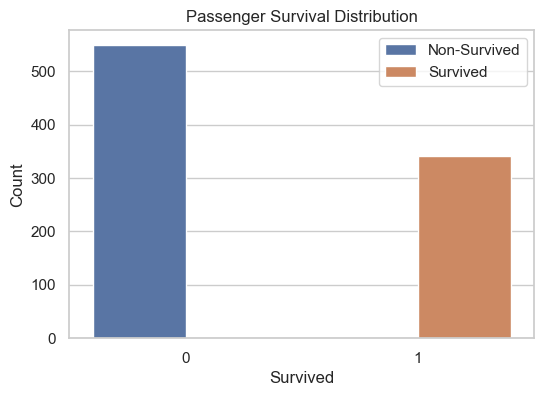

In [9]:
# Assuming 'train_df' is the DataFrame containing the data
sns.set(style="whitegrid")  

plt.figure(figsize=(6, 4)) 
sns.countplot(x='survived', data=train_df, hue="survived")  
plt.xlabel('Survived')  
plt.ylabel('Count')  
plt.title('Passenger Survival Distribution')  
plt.legend(labels=['Non-Survived', 'Survived'])

plt.show()


In [10]:
print("Categorical feature distributions:")
print(train_df['sex'].value_counts())
print(train_df['pclass'].value_counts())
print(train_df['embarked'].value_counts())

Categorical feature distributions:
male      577
female    314
Name: sex, dtype: int64
3    491
1    216
2    184
Name: pclass, dtype: int64
s    644
c    168
q     77
Name: embarked, dtype: int64


In [11]:
print("Outliers in 'Age':")
train_df[train_df['age'] > train_df['age'].mean() + 3 * train_df['age'].std()]

Outliers in 'Age':


,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
630,631,1,1,"barkworth, mr. algernon henry wilson",male,80.0,0,0,27042,30.000,a23,s
851,852,0,3,"svensson, mr. johan",male,74.0,0,0,347060,7.775,NaN,s


In [12]:
print("Outliers in 'Fare':")
train_df[train_df['fare'] > train_df['fare'].mean() + 3 * train_df['fare'].std()]

Outliers in 'Fare':


,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
27,28,0,1,"fortune, mr. charles alexander",male,19.0,3,2,19950,263.0000,c23 c25 c27,s
88,89,1,1,"fortune, miss. mabel helen",female,23.0,3,2,19950,263.0000,c23 c25 c27,s
118,119,0,1,"baxter, mr. quigg edmond",male,24.0,0,1,pc 17558,247.5208,b58 b60,c
258,259,1,1,"ward, miss. anna",female,35.0,0,0,pc 17755,512.3292,NaN,c
299,300,1,1,"baxter, mrs. james (helene delaudeniere chaput)",female,50.0,0,1,pc 17558,247.5208,b58 b60,c
311,312,1,1,"ryerson, miss. emily borie",female,18.0,2,2,pc 17608,262.3750,b57 b59 b63 b66,c
341,342,1,1,"fortune, miss. alice elizabeth",female,24.0,3,2,19950,263.0000,c23 c25 c27,s
377,378,0,1,"widener, mr. harry elkins",male,27.0,0,2,113503,211.5000,c82,c
380,381,1,1,"bidois, miss. rosalie",female,42.0,0,0,pc 17757,227.5250,NaN,c
438,439,0,1,"fortune, mr. mark",male,64.0,1,4,19950,263.0000,c23 c25 c27,s


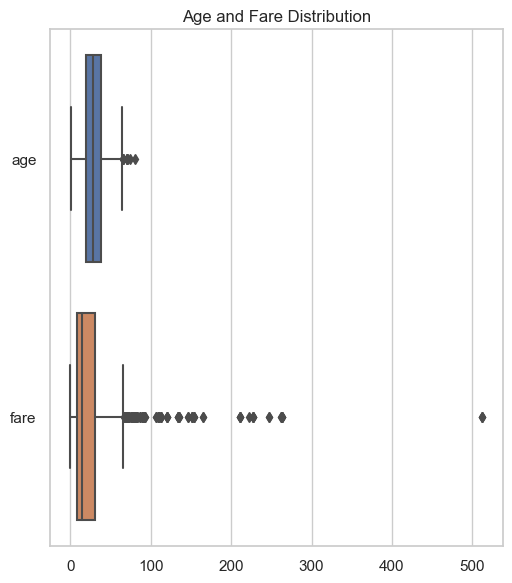

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_side_by_side_violin(data, title):
    sns.set(style="whitegrid")  
    plt.figure(figsize=(10, 6))  
    plt.subplot(1, 2, 1)  
    sns.boxplot(data=data[["age", "fare"]], orient="h")
    plt.title(f'{title}')

    plt.tight_layout()  
    plt.show()

plot_side_by_side_violin(train_df, 'Age and Fare Distribution')


<h1 style="font-family: Trebuchet MS; font-size: 20px; color: #b47238; text-align: left; "><b>Observations</b></h1>

- The train dataset contains 891 records and 12 columns. 
- The cabin column has a significant number of missing values (approximately 77%). This high percentage of missing data raises some challenges for analysis and modeling.
- The age column also contains missing values, but the percentage is relatively lower (around 19.8%).
- The embarked column has only 2 missing values, which is a small proportion of the dataset.
- The target variable is called: 'survived' there is 62% of non survivors and 38% of survivors, which indicates and imbalanced dataset. 


In [24]:
age_by_class = train_df.groupby('pclass').age.count()
age_by_class

pclass
1    186
2    173
3    355
Name: age, dtype: int64

<AxesSubplot:xlabel='age', ylabel='class'>

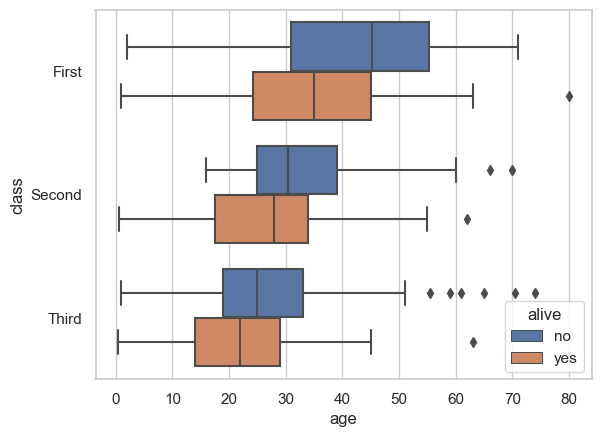

In [28]:
df = sns.load_dataset("titanic")
sns.boxplot(data=df, x="age", y="class", hue="alive")

In [30]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
